In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv(r"C:\Users\samarth\Desktop\Assignment_PUN\DM Assignment Absenteeism at work\Absenteeism_at_work.csv", sep=';') 

In [2]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [4]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# checking for null values
df.isna().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [6]:
# As the absenteen hour cannot be more than 24 per day thefore removing
# The records where hour is more than 24
df = df.drop(df[df.absenteeism_time_in_hours > 24].index).reset_index(drop = True)

In [7]:
# As the data set as months till 12 therefore month 0 is invalid
# Therefore removing records for month 0
df = df.drop(df[df.month_of_absence == 0].index).reset_index(drop = True)

In [8]:
# There is no feature in the dataset which can clearly identify duplicate therefore commenting
# df = df.drop(df[df.duplicated(subset=None, keep='first')].index).reset_index(drop = True)


In [9]:
# As the dataset has a derived attribute BMI which depends on person's height and weight therefore
# We can remove the attributes height and weight
df = df.drop(['weight', 'height'], axis=1)

In [10]:
df

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,23,4
8,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,29,8
9,20,1,7,2,1,260,50,11,36,239.554,97,0,1,4,1,0,0,23,8


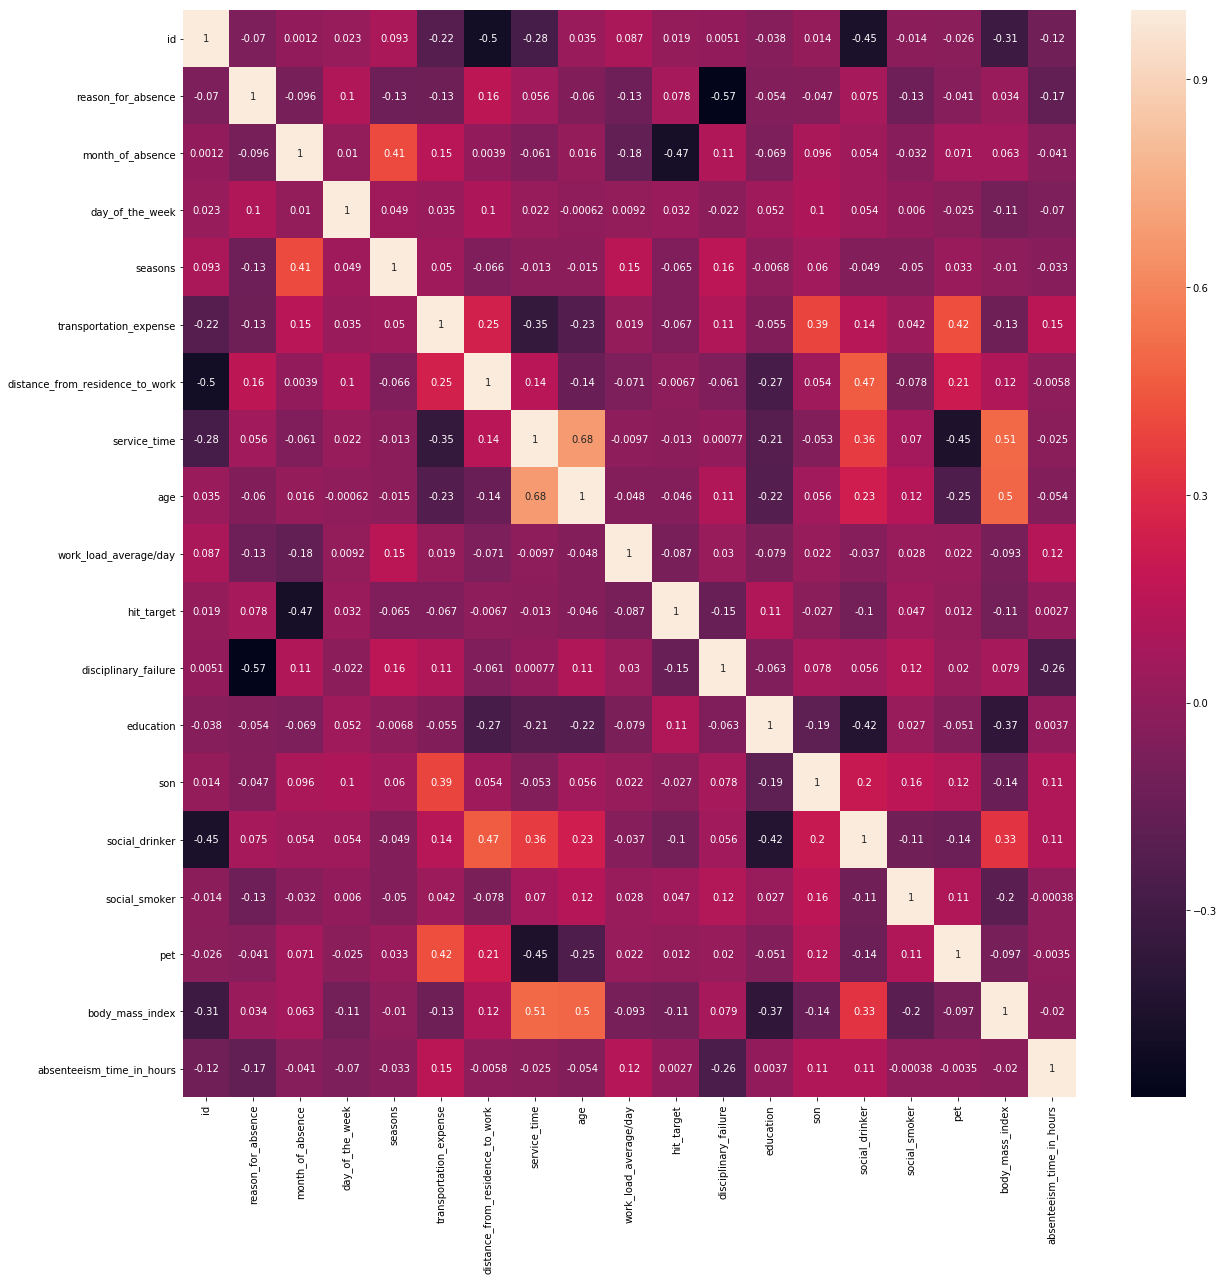

In [12]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(df.corr(), annot = True, ax = ax)

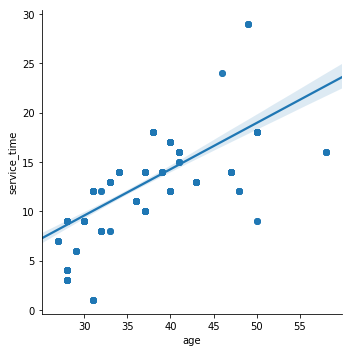

In [13]:
# From the above heatmap we can obeserve the strong correlated atributes
# Positive : [age,service_time] , [body_mass_index,service_time], [body_mas_index, age], [pet, transportation_expense]
# Negative : [hit_target, month_of_absense], [pet, service_time], [disciplinary_failure, reason_for_absense]
# Plotting the above attributes

sns.lmplot(x='age', y='service_time', data=df, fit_reg=True)


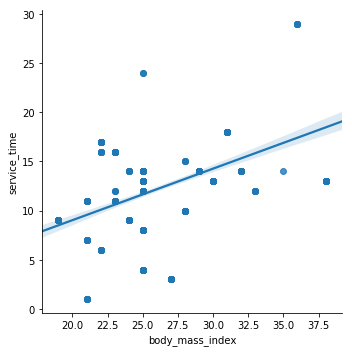

In [14]:

sns.lmplot(x='body_mass_index', y='service_time', data=df, fit_reg=True)


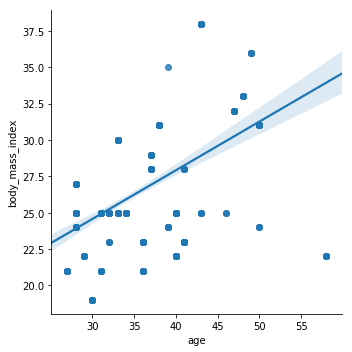

In [15]:
sns.lmplot(x='age', y='body_mass_index', data=df, fit_reg=True)


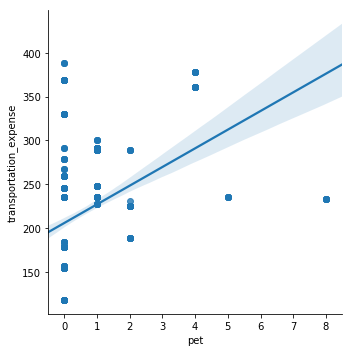

In [16]:
sns.lmplot(x='pet', y='transportation_expense', data=df, fit_reg=True)


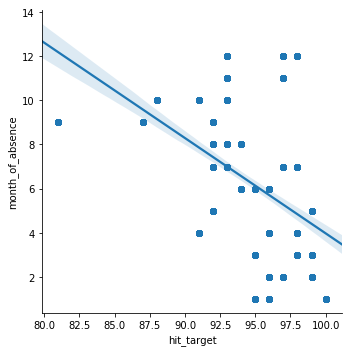

In [17]:
sns.lmplot(x='hit_target', y='month_of_absence', data=df, fit_reg=True)


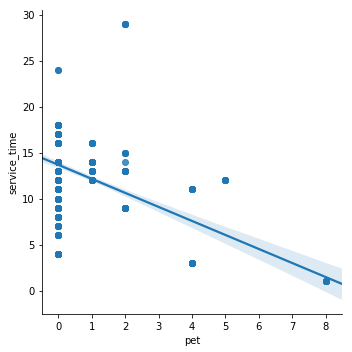

In [18]:
sns.lmplot(x='pet', y='service_time', data=df, fit_reg=True)

In [20]:
y = df['absenteeism_time_in_hours']
X = df.drop(['absenteeism_time_in_hours'], axis=1)

In [23]:
# Min Max Scaler is used after an heuristic approach. It was choosen as it exhibited higher accuracy than it's counter parts.

# Feature Scaling
from sklearn import preprocessing
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled,columns=list(X.columns))

# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print( "\nX_train:\n")
print(X_train.head())
print( X_train.shape)
print( "\nX_test:\n")
print(X_test.head())
print( X_test.shape)


X_train:

           id  reason_for_absence  month_of_absence  day_of_the_week  \
662  0.942857            1.000000          0.363636             0.25   
583  0.057143            0.964286          0.090909             0.50   
181  0.542857            1.000000          0.272727             1.00   
302  0.942857            0.392857          0.909091             0.00   
318  0.542857            0.357143          0.909091             0.50   

      seasons  transportation_expense  distance_from_residence_to_work  \
662  0.666667                0.000000                         0.106383   
583  0.333333                0.225926                         0.978723   
181  0.666667                0.525926                         0.957447   
302  1.000000                0.000000                         0.106383   
318  1.000000                0.525926                         0.957447   

     service_time       age  work_load_average/day  hit_target  \
662      0.321429  0.322581               0.1